# Fatal Police Shootings in the US (2015-2020) 
## A dataset of every fatal shooting in the US since Jan 1st, 2015 until May 26st, 2020.

In [1]:
#להוסיף תמונה לכותרת

In [2]:
#תוכן עניינים

# <b id="section_2">  </b> <b style='color:blue'>1. Relevant libraries </b> <b></b> 

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import geopandas as gpd
from shapely.geometry import Point
#Global Variables
total_population_white = 242083496
total_population_black = 44673729
total_population_asian = 19900000
total_population_hispanic = 62080044
total_population_native = 9491167

In [4]:
ur1= "https://raw.githubusercontent.com/shayTiram/project6/main/fatal-police-shootings-data.csv"
df = pd.read_csv(ur1)
df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5333,5815,TK TK,2020-05-20,shot,gun,NaN,M,NaN,Viera,FL,True,attack,Not fleeing,False
5334,5836,Michael Snyder,2020-05-24,shot,gun,44.0,M,NaN,Bulls Gap,TN,True,attack,Foot,False
5335,5837,Gary P. Dorton,2020-05-25,shot,knife,43.0,M,NaN,Jonesborough,TN,True,attack,Not fleeing,False
5336,5839,TK TK,2020-05-25,shot,gun,38.0,M,H,Houston,TX,False,attack,Not fleeing,False


In [5]:
df.shape

(5338, 14)

In [6]:
df.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')

In [7]:
df.dtypes

id                           int64
name                        object
date                        object
manner_of_death             object
armed                       object
age                        float64
gender                      object
race                        object
city                        object
state                       object
signs_of_mental_illness       bool
threat_level                object
flee                        object
body_camera                   bool
dtype: object

In [8]:
df.isnull().sum().sort_values()

id                           0
name                         0
date                         0
manner_of_death              0
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
body_camera                  0
gender                       2
armed                      240
age                        249
flee                       250
race                       607
dtype: int64

# <b id="section_2">  </b> <b style='color:blue'>corralation </b> <b></b> 

<h4> We decided to examine only the columns that could be a major factor in being killed by a police officer. <h4>

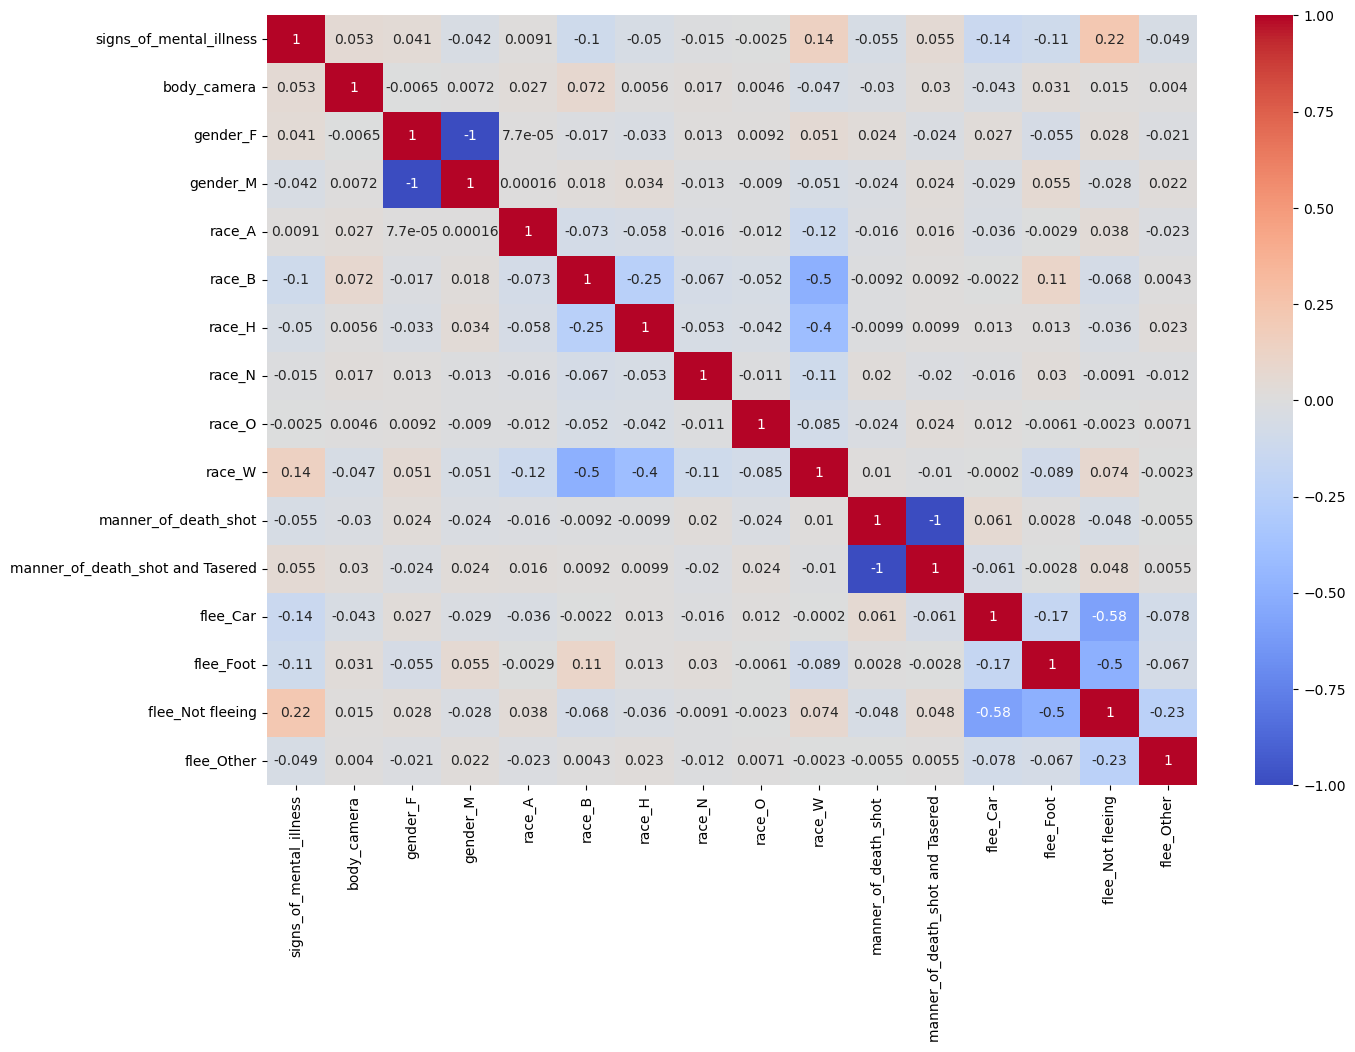

In [9]:
f= ["gender","race","manner_of_death", "signs_of_mental_illness","flee","body_camera"]
new_df = pd.get_dummies(df[f])
new_df[[ "signs_of_mental_illness"]]= new_df[["signs_of_mental_illness"]].astype(int)
corrs = new_df.corr(method = 'kendall')
plt.figure(figsize=(15,10))  
sns.heatmap(corrs, cmap='coolwarm', center=0, annot = True);

<h3>No strong correlations were found between the different factors that could lead to a conclusion.<h3>
    #### note : the highest value in between the whita race to signs of mental illness
   <h3> lets explore the data set by guiding questions<h3>
 

###  Who is the population with the highest number of victims ? 

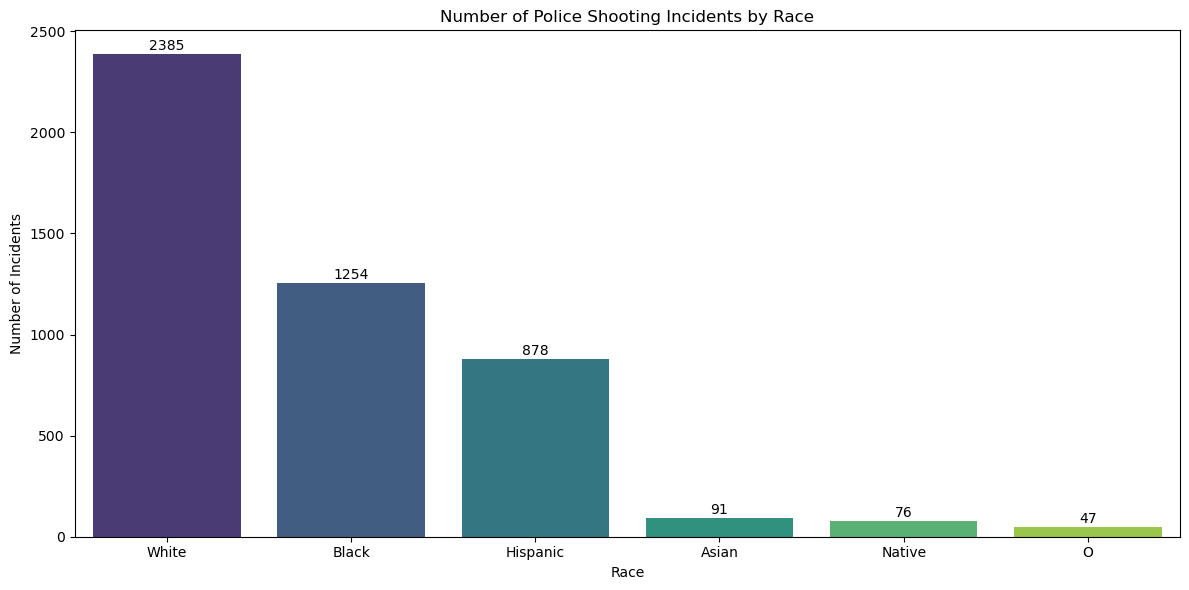

In [10]:
new_race = {'W':'White','B':'Black','H':'Hispanic','A':'Asian','N':'Native'}

df['race'] = df['race'].replace(new_race)

race_counts = df['race'].value_counts().sort_values(ascending=False)

df_race_counts = pd.DataFrame({'Race': race_counts.index, 'Count': race_counts.values})

plt.figure(figsize=(12, 6))
bars = sns.barplot(x='Race', y='Count', data=df_race_counts, palette='viridis')

plt.xlabel('Race')
plt.ylabel('Number of Incidents')
plt.title('Number of Police Shooting Incidents by Race')

for i, v in enumerate(df_race_counts['Count']):
    bars.text(i, v + 5, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()


   <h4> According to the data, it is clear that the population with the highest number of victims it is the white's. However, in our opinion, the data does not provide a final conclusion regarding the population with the most victims because they do not represent the victims relative to their overall population. As a result, we decided to examine this issue using external data  <h4> 

In [11]:
victims_white = 2385
victims_black = 1254
victims_hispanic = 878
victims_asian = 91
victims_native = 76

In [12]:
ratio_white_per_victim = total_population_white / victims_white
ratio_black_per_victim = total_population_black / victims_black
ratio_asian_per_victim = total_population_asian / victims_asian
ratio_hispanic_per_victim = total_population_hispanic/ victims_hispanic
ratio_native_per_victim = total_population_native / victims_native
print(f"יחס ההרוגים לכל אדם באוכלוסייה אסייתית: 1 לכל {ratio_asian_per_victim:.2f} אנשים")
print(f"יחס ההרוגים לכל אדם באוכלוסיית הילידים: 1 לכל {ratio_native_per_victim:.2f} אנשים")
print(f"יחס ההרוגים לכל אדם באוכלוסייה הלבנה: 1 לכל {ratio_white_per_victim:.2f} אנשים")
print(f"יחס ההרוגים לכל אדם באוכלוסייה היספאנים: 1 לכל {ratio_hispanic_per_victim:.2f} אנשים")
print(f"יחס ההרוגים לכל אדם באוכלוסייה השחורה: 1 לכל {ratio_black_per_victim:.2f} אנשים")

יחס ההרוגים לכל אדם באוכלוסייה אסייתית: 1 לכל 218681.32 אנשים
יחס ההרוגים לכל אדם באוכלוסיית הילידים: 1 לכל 124883.78 אנשים
יחס ההרוגים לכל אדם באוכלוסייה הלבנה: 1 לכל 101502.51 אנשים
יחס ההרוגים לכל אדם באוכלוסייה היספאנים: 1 לכל 70706.20 אנשים
יחס ההרוגים לכל אדם באוכלוסייה השחורה: 1 לכל 35624.98 אנשים


In [13]:
ratio_white =101502.51
ratio_black = 35624.98
ratio_asian = 218681.32
ratio_hispanic = 70706.20
ratio_native = 124883.78

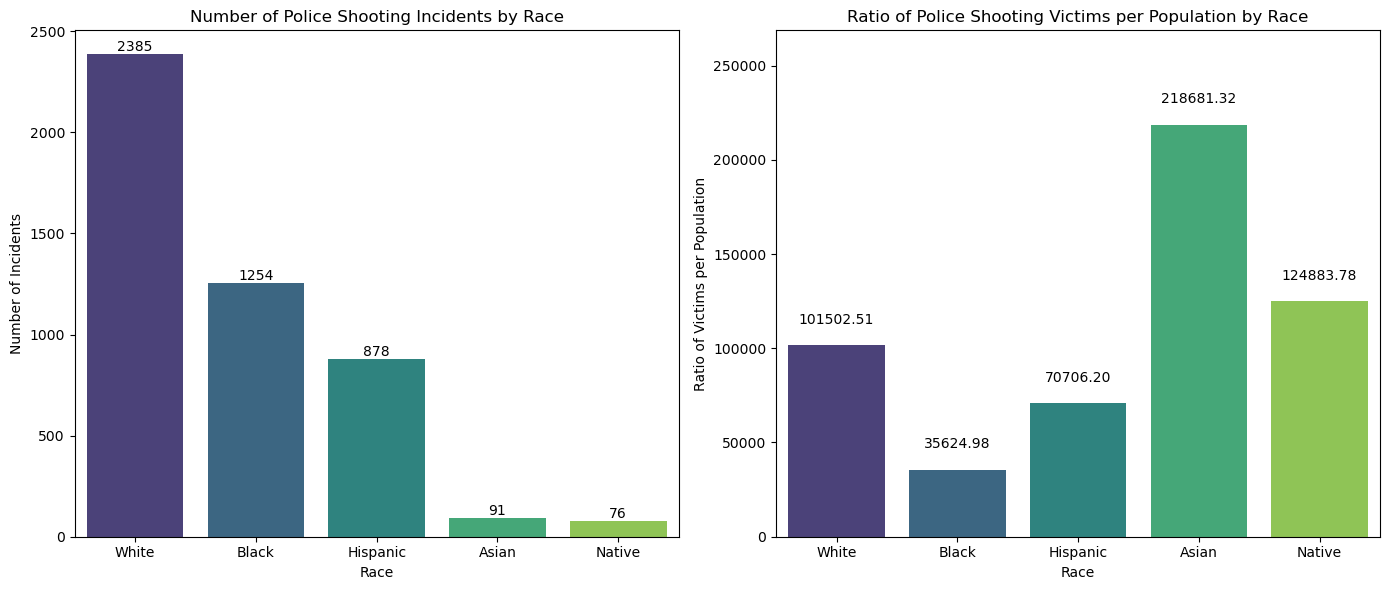

In [17]:
ratios = {
    'White': ratio_white, 
    'Black': ratio_black,   
    'Asian': ratio_asian,  
    'Hispanic': ratio_hispanic,  
    'Native': ratio_native
}

race_counts = df['race'].value_counts()

# Filter out the 'O' (Other) race and recalculate the values
filtered_race_counts = race_counts[race_counts.index != 'O']

# Create a DataFrame for plotting without 'O'
filtered_plot_data = pd.DataFrame({
    'Race': filtered_race_counts.index,
    'Number of Incidents': filtered_race_counts.values,
    'Ratio of Victims per Population': [ratios[race] for race in filtered_race_counts.index]
})


plt.figure(figsize=(14, 6))


plt.subplot(1, 2, 1)
bars = sns.barplot(x=filtered_race_counts.index, y=filtered_race_counts.values, palette='viridis')
plt.xlabel('Race')
plt.ylabel('Number of Incidents')
plt.title('Number of Police Shooting Incidents by Race')



for i, v in enumerate(filtered_race_counts):
    bars.text(i, v + 0.5, str(v), ha='center', va='bottom')


plt.subplot(1, 2, 2)
bars2 = sns.barplot(x=filtered_plot_data['Race'], y=filtered_plot_data['Ratio of Victims per Population'], palette='viridis')
plt.xlabel('Race')
plt.ylabel('Ratio of Victims per Population')
plt.title('Ratio of Police Shooting Victims per Population by Race')

# Adding values on top of the bars
for i, v in enumerate(filtered_plot_data['Ratio of Victims per Population']):
    plt.text(i, v + 10000, f'{v:.2f}', ha='center', va='bottom', fontsize=10)

plt.ylim(0, max(filtered_plot_data['Ratio of Victims per Population']) + 50000)

plt.tight_layout()
plt.show()

# <b id="section_2">  </b> <b style='color:blue'> Observation 1: </b> <b></b> 

### נביט על השינוי בגרף כאשר אנחנו מסתכלים על האוכלוסיה באופן יחסי 
<li> .האוכלוסיה שנהרגת על ידי המשטרה ביחס הנמוך ביותר היא ההיספאנים 
<li>  .האוכלוסיה שנהרגת על ידי המשטרה ביחס הגבוה ביותר היא השחורה 

# <b id="section_2">  </b> <b style='color:blue'> Behavior Analysis </b> <b></b> 

In [15]:
race_labels = {'A': 'Asian', 'N': 'Native', 'H': 'Hispanic', 'B': 'Black', 'W': 'White', 'O': 'Others'}

# רשימת הגזעים הייחודיים בנתונים
races = df['race'].dropna().unique()

# יצירת מילון לאחסון ספירת המקרים לכל גזע
race_counts = {}
total_counts = []

# קטגוריות המקרים והצבעים המתאימים
categories = ['Mental Illness', 'Armed', 'Fleeing', 'Was body camera']
colors = ['blue', 'orange', 'green', 'red']  

for race in races:
    race_data = df[df['race'] == race]
    total_race = len(race_data)

    mental_illness = race_data['signs_of_mental_illness'].sum()
    armed = race_data['armed'].notnull().sum()
    fleeing = (race_data['flee'] != 'Not fleeing').sum()
    body_camera = race_data['body_camera'].sum()

    counts = [mental_illness, armed, fleeing, body_camera]
    percentages = [100 * count / total_race for count in counts]

    race_counts[race_labels[race]] = percentages
    total_counts.append(total_race)

# קביעת הערך המקסימלי לציר ה-y
max_y = max([max(percentages) for percentages in race_counts.values()])

# יצירת גרף לכל גזע
fig, axes = plt.subplots(1, len(race_counts), figsize=(20, 6), sharey=True)

for ax, (race, percentages) in zip(axes, race_counts.items()):
    bars = ax.bar(categories, percentages, color=colors)
    ax.set_title(f'{race} Individuals')
    ax.set_xlabel('Categories')
    ax.set_ylim(0, max_y + 10)
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}%'))
    ax.tick_params(axis='x', rotation=45, labelsize=10)  
    for i, bar in enumerate(bars):
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{percentages[i]:.1f}%', ha='center', va='bottom')

axes[0].set_ylabel('Percentage of Fatal Shootings')
fig.suptitle('Characteristics of Fatal Police Shootings by Race')
plt.subplots_adjust(wspace=0.6)  
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

KeyError: 'Asian'

### result from the graph:

<li>אצל הלבנים השימוש במצלמות גוף הוא הנמוך ביותר

<li>הלבנים הם האוכלוסיה בעלת שיעור חולי הנפש הגבוה ביותר

<li>הלבנים הם האוכלוסיה בעלת שיעור חולי הנפש הגבוה ביותר

<li> אוכלוסיות המיעוט נוטות לברוח יותר מהמשטרה (למעט האסייתים, אפשר להסביר את זה על ידי התרבות האסייתית שמתאפיינת בציות מוחלט לחוק)

<li>כל האוכלוסיות  היו חמושות פחות או יותר באופן שווה (קניית נשק באמריקה חוקית)

# <b id="section_2">  </b> <b style='color:blue'> Observation 2 : </b> <b></b> 

מתוך המידע שעולה מהגרפים ניתן להסיק כי השוטרים נוטים להקפיד יותר על השימוש במצלמות גוף כאשר הם באים במגע עם אוכלוסיות מיעוט, ככל הנראה גל המחאות כנגד אלימות השוטרים ביחד עם עליית תנועת  הבלאק ליייף מאטר (2013) גרם להגברת המודעות של השוטרים לצורך לתעד את האירוע בכדי להיות מוגנים יותר מבחינה משפטית ואתית. 
יחד עם זאת הלבנים הם בעלי תבחינים של בריאות נפשית לקויה דבר שיכל להגביר את החיכוך שלהם עם השוטרים ולהוביל ליחס גבוה יותר בהרוגים הלבנים, אך למרות זאת מתוך יחס ההרוגים לאוכלוסייה עולה אחרת. 
בנוסף, אוכלוסיות המיעוט נוטות לברוח יותר מהשוטרים ככל הנראה בעקבות סיטואציות עבר טראומטיות או הרגשתם ליחס עוין כלפי אוכלוסייתם כל זאת גרם לנו להסיק כי : השוטרים תקיפים יותר כלפי אוכלוסיות המיעוט השונות באמריקה ויש מקום לשנות יחס זה ואולי בכך יהיה ניתן למנוע הרג של אזרחים (גם אם הם לא חפים מפשע אולי האירוע יוכל להסתיים במעצר)   

---
---
---

<h4>From the initial conclusion, we understood that the American police disproportionately contributed to the deaths of vulnerable populations compared to their proportion in the population. We decided to investigate whether this is characteristic of the American police by examining the population of women and minors killed by police.<h4>

In [ ]:
gender = df[df["gender"] != "unknown"]
plt.figure(figsize=(5,3))
plt.title("Fatalities By Gender", size = 10)
gender['gender'].value_counts().plot.pie(autopct="%1.1f%%") 
plt.ylabel("")  
plt.show()

In [ ]:
women_df = df[df['gender'] == 'F']
women_count = len(women_df) 
print('Number of women killed by police:', women_count)
men_df = df[df['gender'] == 'M']
men_count = len(men_df)
print('Number of men killed by police:', men_count)

In [ ]:
state_counts = df.groupby('state').size().reset_index(name='count')

total_cases = state_counts['count'].sum()
state_counts['percentage'] = (state_counts['count'] / total_cases) * 100

state_counts = state_counts.sort_values(by='count', ascending=False)

# Define colors for the bars
colors = ['#1f77b4'] * 3 + ['#d3d3d3'] * (len(state_counts) - 3)


plt.figure(figsize=(15, 7))  # Increase the figure size for better readability
sns.barplot(x='state', y='percentage', data=state_counts, palette=colors)
plt.title('Percentage of Population Killed by Police in Each State')
plt.xlabel('State')
plt.ylabel('Percentage')
plt.ylim(0, max(state_counts['percentage']) + 5)
plt.xticks(rotation=45)
plt.grid(axis='y')

for i, v in enumerate(state_counts['percentage']):
    plt.text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom', rotation=45)

plt.tight_layout()
plt.subplots_adjust(bottom=0.2)  
plt.show()